In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [77]:
# VARS

period_of_time = 7 # weekly
country = 'Poland'


In [78]:
# downloading data

covid_data = requests.get(
    'https://opendata.ecdc.europa.eu/covid19/testing/csv/data.csv')

with open('covid_data.csv', 'wb') as f:
    f.write(covid_data.content)


In [79]:
df = pd.read_csv('covid_data.csv')
df = df[['country', 'year_week', 'level', 'new_cases', 'tests_done']]
df = df[df.country == f'{country}']
df = df.tail(period_of_time)
df = df.assign(cases_divided_by_tests = lambda x: (x.new_cases / x.tests_done))
df

,country,year_week,level,new_cases,tests_done,cases_divided_by_tests
3449,Poland,2022-W33,national,24383.0,67036.0,0.363730
3450,Poland,2022-W34,national,23366.0,69701.0,0.335232
3451,Poland,2022-W35,national,20183.0,67265.0,0.300052
3452,Poland,2022-W36,national,25348.0,74602.0,0.339776
3453,Poland,2022-W37,national,32117.0,92752.0,0.346267
3454,Poland,2022-W38,national,28685.0,94945.0,0.302122
3455,Poland,2022-W39,national,23613.0,86244.0,0.273793


In [80]:
y1 = df['new_cases']
y2 = df['tests_done']
y3 = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)
x = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)

last_week_avg = int(df.tail(1).new_cases/7)


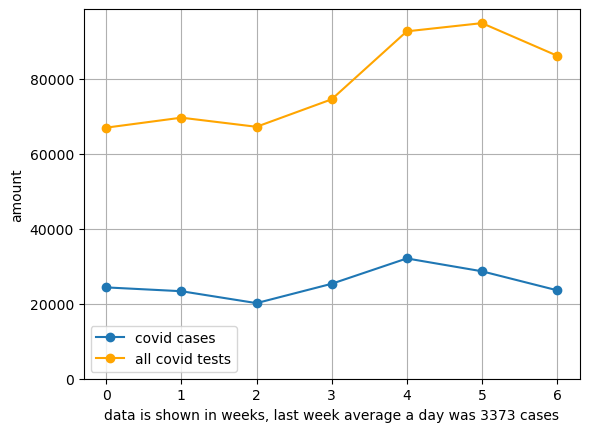

In [81]:
# plotting
fig, ax = plt.subplots()

# getting the data
ax.plot(x, y1, '-o', label = 'covid cases')
ax.plot(x, y2, '-o', color='orange', label = 'all covid tests')

# unhelpful comment of x and y axis
plt.ylabel(f'amount')
plt.xlabel(f'data is shown in weeks, last week average a day was {last_week_avg} cases')
# setting up a legend
ax.legend(loc='lower left')

ax.grid()
# plot starts at 0
plt.ylim(0)
plt.savefig('covid_daily.jpeg')


In [82]:
plt.close()